# Compare Germany data sources: JHU and RKI

See [this earlier post](compare-rki-and-jhu-data.html) for an introduction. Here we continue the comparison of RKI and JHU with some additional plots. 

In particular, we note a significant delay in the provision of numbers of deaths in the RKI data ("Meldeverzug"). It is known that it takes some time for infectionts and deaths to be reported to the Robert Koch Institute (RKI). Here we investigate how long by taking one snapshot of data for cases and infections (on 14 Nov 2020) and comparing this with the same data downloaded more recently. 


In [1]:
%config InlineBackend.figure_formats = ['svg']
import datetime
import numpy as np
import pandas as pd
import oscovida as ov

ov.display_binder_link("2020-compare-germany-data-sources.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/2020-compare-germany-data-sources.ipynb)

In [2]:
# clear the local cache, i.e. force re-download of data sets
# ov.clear_cache()

## Get data from Johns Hopkins University (JHU)

In [3]:
cases_jhu, deaths_jhu = ov.get_country_data("Germany")

## Get data from Robert-Koch Institute (RKI)


In [4]:
germany = ov.fetch_data_germany()

As we want the total numbers for Germany, wwe need to accumulate over all districts (Landkreise) and various rows for each date:

In [5]:
# We use 'Meldedatum' as this is expected to be closest to the JHU data
g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))
# an interesting alternative to explore is 'Refdatum':
# g2 = germany.set_index(pd.to_datetime(germany['Refdatum']))

g2.index.name = 'date'
g3 = g2.groupby('date').agg('sum')
cases_rki = g3["AnzahlFall"].groupby('date').agg('sum').cumsum()
deaths_rki = g3["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()


## Comparison of cases between from JHU and RKI: pretty similar

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


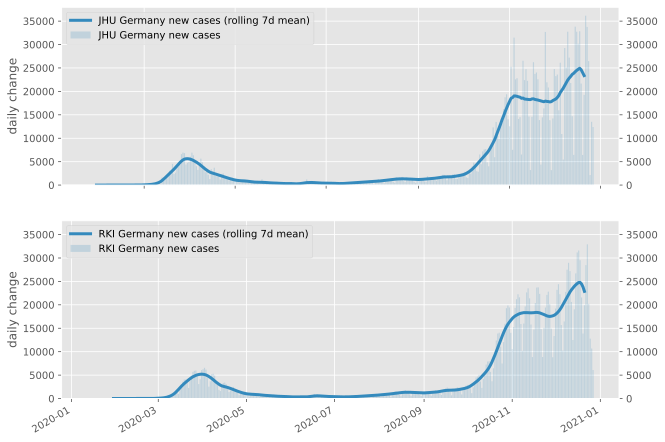

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
ov.plot_daily_change(ax, cases_jhu, color="C1", labels=["JHU Germany", "cases"])
ax = axes[1]
ov.plot_daily_change(ax, cases_rki, color="C1", labels=["RKI Germany", "cases"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());

While there are differences in the data sets (the bars), the overall trend (line) appears similar. 

## Comparison of deaths between from JHU and RKI: quite different

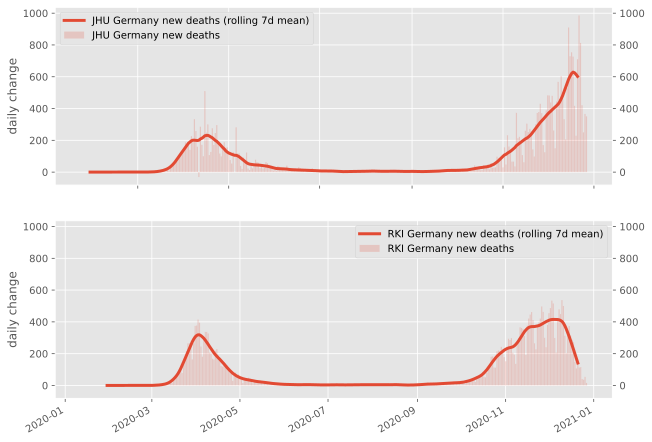

In [7]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
ov.plot_daily_change(ax, deaths_jhu, color="C0", labels=["JHU Germany", "deaths"])
ax = axes[1]
ov.plot_daily_change(ax, deaths_rki, color="C0", labels=["RKI Germany", "deaths"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());

The deaths from JHU and RKI differ significantly (see in particular the most recent data points, i.e. to the right in the two plots).

## Discussion

The JHU and RKI data provided for Germany show some differences, including:

- the JHU data is noisier in comparison to the smoother RKI data
- the amount of deaths in the last weeks is overestimated in the JHU data or underestimated in the RKI

Both phenomena can be explained with the hypothesis that the RKI data is updated retrospectively to introduce corrections: if a death that has been occured 3 days ago is registered with the RKI, it will update the data set and add that death to the date 3 days ago. In contrast, we hypothesize that the JHU data appears to try to be as accurate as possible, but not retrospectively change dates in the past but rather add corrective numbers to the last data point (sometimes even negative deaths if required to compensate for inaccurate data). 

The more regular data from the RKI is thus explainable by the retrospective improvement of the data: as more and more numbers appear at the RKI (even from weeks in the past), the data set becomes increasingly more accurate. 

The underestimation of deaths and cases from RKI could also be explained: as reported cases and deaths may only arrive at the RKI days after their occurance, the numbers that are reported today for yesterday are likely to be too small. There is a danger that this is misleading. We investigate this aspect further now.



# Example  study: deaths up to 13 November 2020

To emphasive the delay in the numbers being reported, we look at a particular data set up to 13 November 2020 as an example:

On 14 November, we saved the dataset *as it was available then* from the RKI and the JHU university to local files. We now load the data as it was downloded on 14 November 2020, i.e. with the last data point from 13 Nov:


In [8]:
# The code used to create the RKI data set is 
# # We use 'Meldedatum' as this is expected to be closest to the JHU data
# germany = ov.fetch_data_germany()
# g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))
# g2.index.name = 'date'
# g3 = g2.groupby('date').agg('sum')
# cases_rki = g3["AnzahlFall"].groupby('date').agg('sum').cumsum()
# deaths_rki = g3["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()
# (then save to csv file)

In [9]:
cases_rki_old = pd.read_csv("cases-rki-germany-meldedatum-2020-11-13.csv", parse_dates=['date'], 
                            index_col=0, squeeze=True)
deaths_rki_old = pd.read_csv("deaths-rki-germany-meldedatum-2020-11-13.csv", parse_dates=['date'], 
                             index_col=0, squeeze=True)
cases_jhu_old = pd.read_csv("cases-jhu-germany-2020-11-13.csv", parse_dates=[0], 
                            index_col=0, squeeze=True)
deaths_jhu_old = pd.read_csv("deaths-jhu-germany-2020-11-13.csv", parse_dates=[0], 
                             index_col=0, squeeze=True)

We will see below that the JHU data for that period as downloaded on 14 November has not changed between then and the data downloaded today. We check this by substracting the values for each day between 1 September and 13 November 2020, and looking at the maximum:

In [10]:
startdate = "2020-09-01"
enddate = "2020-11-13"

In [11]:
max(abs(deaths_jhu_old[startdate:enddate] - deaths_jhu[startdate:enddate]))

0

In [12]:
max(abs(cases_jhu_old[startdate:enddate] - cases_jhu[startdate:enddate]))

0

The RKI data, on the other hand, has changed. For example:

In [13]:
max(abs(cases_rki_old[startdate:enddate] - cases_rki[startdate:enddate]))

13125

We investigate this more systematically:

## Comparison between RKI deaths for Sept/Oct/Nov from 13 Nov and later

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


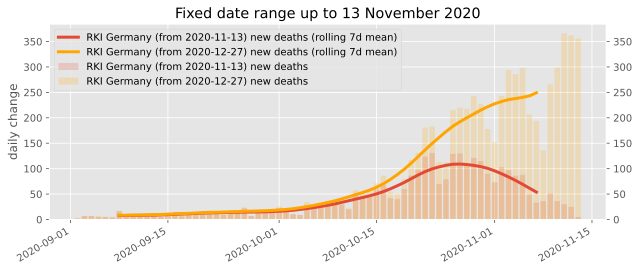

In [14]:
fig, ax = plt.subplots(figsize=(10, 4))
startdate = "2020-09-01"
enddate = "2020-11-13"
todaystring = deaths_jhu.index[-1].strftime("%Y-%m-%d")  # something like 202?-??-?? 

ov.plot_daily_change(ax, deaths_rki_old[startdate:enddate], color="C0", 
                     labels=["RKI Germany (from 2020-11-13)", "deaths"])
fig.autofmt_xdate()
ov.plot_daily_change(ax, deaths_rki[startdate:enddate], color='orange', 
                     labels=[f"RKI Germany (from {todaystring})", "deaths"])
ax.set_title("Fixed date range up to 13 November 2020");
ax.legend()


The plot above shows the daily new deaths as reported on 14 November from RKI in red (bars, and 7-day averaged data shown as line) and as reported today in orange (bars, and 7-day averaged data shown as line).

The deviation in the reported deaths in the last 2 weeks is quite significant! This is a big warning sign that when we consider deaths in the recent past through data reported from the RKI, we must take into account that in the last one or two weeks the reported numbers are likely to be incomplete and to grow over time.

We have quick look at infections, before studying the delay in reported deaths more systematically.

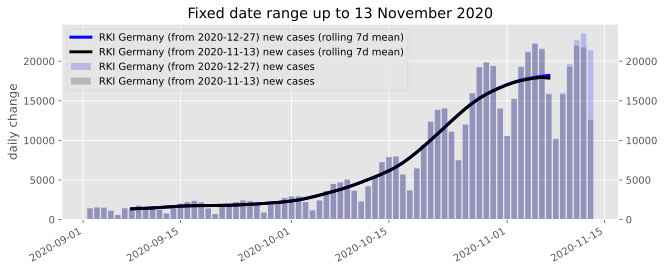

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
startdate = "2020-09-01"
enddate = "2020-11-13"

ov.plot_daily_change(ax, cases_rki[startdate:enddate], color="blue", 
                     labels=[f"RKI Germany (from {todaystring})", "cases"])
ov.plot_daily_change(ax, cases_rki_old[startdate:enddate], color="black", 
                     labels=["RKI Germany (from 2020-11-13)", "cases"])
fig.autofmt_xdate()

ax.set_title("Fixed date range up to 13 November 2020");


The deviation in the number of cases (blue as reported today, black as reported on 14 November 2020 - they appear darker when plotted on top of each other in the bars) is much smaller than for deaths: only for the last day is a significant deviation visible.

Let's look at just the differences in reported infections as function of how much time there was between the day in question and the day we have downloaded the numbers:

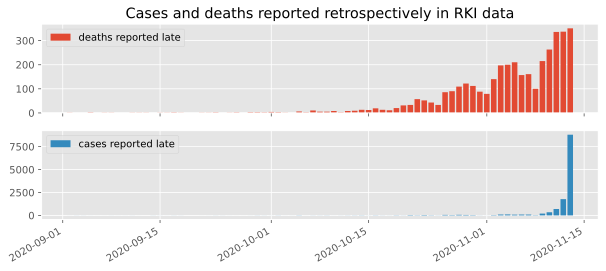

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(10, 4))
startdate = "2020-09-01"
enddate = "2020-11-13"
enddate = "2020-11-13"

diff_deaths_rki = deaths_rki[startdate:enddate].diff() - deaths_rki_old[startdate:enddate].diff()
diff_cases_rki = cases_rki[startdate:enddate].diff() - cases_rki_old[startdate:enddate].diff()

ax = axes[0]
ax.plot()
ax.bar(diff_deaths_rki.index, diff_deaths_rki.values, color="C0", label="deaths reported late")
ax.legend(loc='upper left')
ax = axes[1]
ax.bar(diff_cases_rki.index, diff_cases_rki.values, color="C1", label="cases reported late");
ax.legend(loc='upper left')


axes[0].set_title("Cases and deaths reported retrospectively in RKI data");
fig.autofmt_xdate();


In the top plot above, we can see the difference in deaths between the report from 14 November and today. We can see that on the day, there was a deviation of about 300, which decreases when looking at earlier dates: two weeks before (1 November) the deviation is only about 100.

For the infections (lower plot), the deviation is only significicant for the last few days before 14 November.

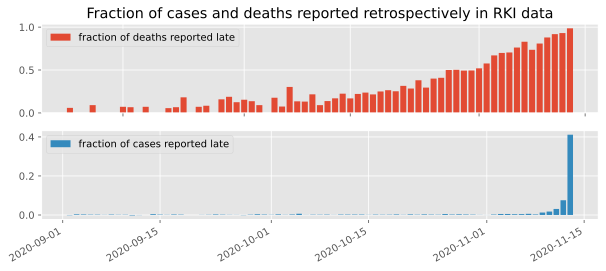

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(10, 4))
ax = axes[0]
ax.plot()

# for late deaths: ignore data points where the total number of data points is smaller than n
# this avoids that one late report for a death (out of 4 in total) shows up as 25% error:
n = 10
tmp = deaths_rki.diff()
tmp[tmp < 10] = np.nan
diff_deaths_rel = diff_deaths_rki / tmp
# case numbers are so high that this is no problem
diff_cases_rel = diff_cases_rki / cases_rki.diff()

ax.bar(diff_deaths_rel.index, diff_deaths_rel.values, color="C0", label="fraction of deaths reported late")
ax.legend(loc='upper left')
ax = axes[1]
ax.bar(diff_cases_rel.index, diff_cases_rel.values, color="C1", label="fraction of cases reported late");
ax.legend(loc='upper left')

axes[0].set_title("Fraction of cases and deaths reported retrospectively in RKI data");
fig.autofmt_xdate()

The reported cases between JHU and RKI are fairly comparable; although looking at the rolling average the JHU estimates the numbers in the last 2 weeks a bit higher than RKI.

# Comparison cases and deaths for the past few weeks

In [18]:
deaths_rki.diff()['2020-09-01':'2020-09-05'], deaths_rki_old.diff()['2020-09-01':'2020-09-05'], deaths_rki.diff()['2020-09-02']

(date
 2020-09-01    3.0
 2020-09-02    3.0
 2020-09-03    7.0
 2020-09-04    7.0
 2020-09-05    7.0
 Name: AnzahlTodesfall, dtype: float64,
 date
 2020-09-01    3.0
 2020-09-02    2.0
 2020-09-03    7.0
 2020-09-04    7.0
 2020-09-05    5.0
 Name: AnzahlTodesfall, dtype: float64,
 3.0)

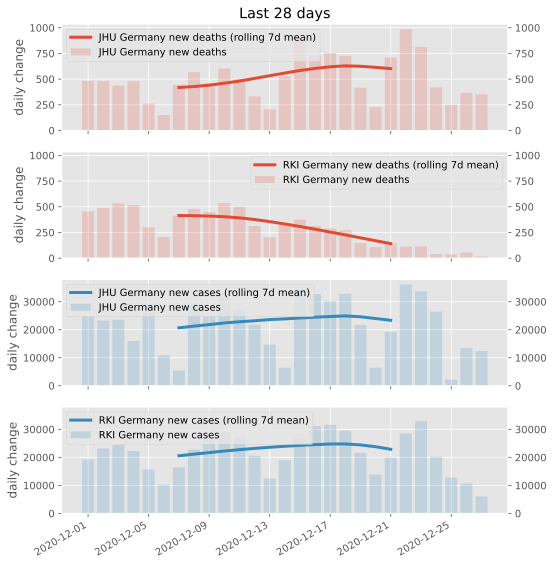

In [19]:
fig, axes = plt.subplots(4, 1, figsize=(8, 10))
ax = axes[0]
last_n_days = 28
ov.plot_daily_change(ax, deaths_jhu[-last_n_days:], color="C0", labels=["JHU Germany", "deaths"])
ax = axes[1]
ov.plot_daily_change(ax, deaths_rki[-last_n_days:], color="C0", labels=["RKI Germany", "deaths"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());
axes[0].set_title(f"Last {last_n_days} days");

ax = axes[2]
ov.plot_daily_change(ax, cases_jhu[-last_n_days:], color="C1", labels=["JHU Germany", "cases"])
ax = axes[3]
ov.plot_daily_change(ax, cases_rki[-last_n_days:], color="C1", labels=["RKI Germany", "cases"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());
axes[3].set_ylim(axes[2].get_ylim());

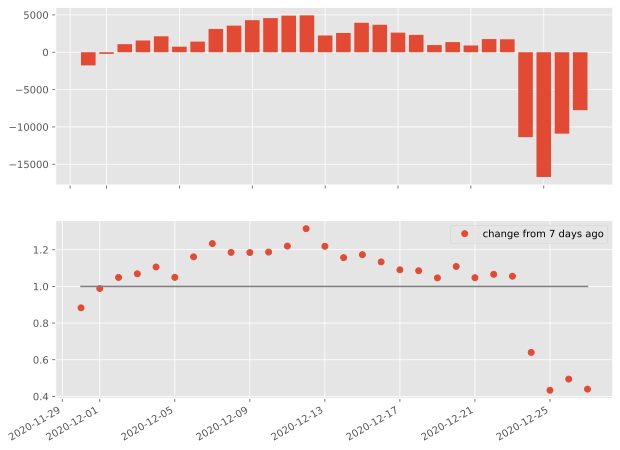

In [20]:
delta7 = cases_rki.diff() - cases_rki.diff().shift(7)
delta7 = delta7[-28:]
ratio7 = cases_rki.diff()/cases_rki.diff().shift(7)
ratio7 = ratio7[-28:]

delta7 = cases_rki.diff() - cases_rki.diff().shift(7)
delta7 = delta7[-28:]
ratio7 = cases_rki.diff()/cases_rki.diff().shift(7)
ratio7 = ratio7[-28:]

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].bar(delta7.index, delta7.values)
ax[1].plot(ratio7.index, ratio7.values, 'o', label='change from 7 days ago')
ax[1].plot([min(ratio7.index), max(ratio7.index)], [1.0, 1.0], color='grey')
ax[1].legend()
fig.autofmt_xdate()

In [21]:
cases_rki[-10:]

date
2020-12-18    1485175
2020-12-19    1506746
2020-12-20    1520598
2020-12-21    1540538
2020-12-22    1569009
2020-12-23    1601919
2020-12-24    1622138
2020-12-25    1634925
2020-12-26    1645593
2020-12-27    1651685
Name: AnzahlFall, dtype: int64

# Overview plot Germany with RKI data

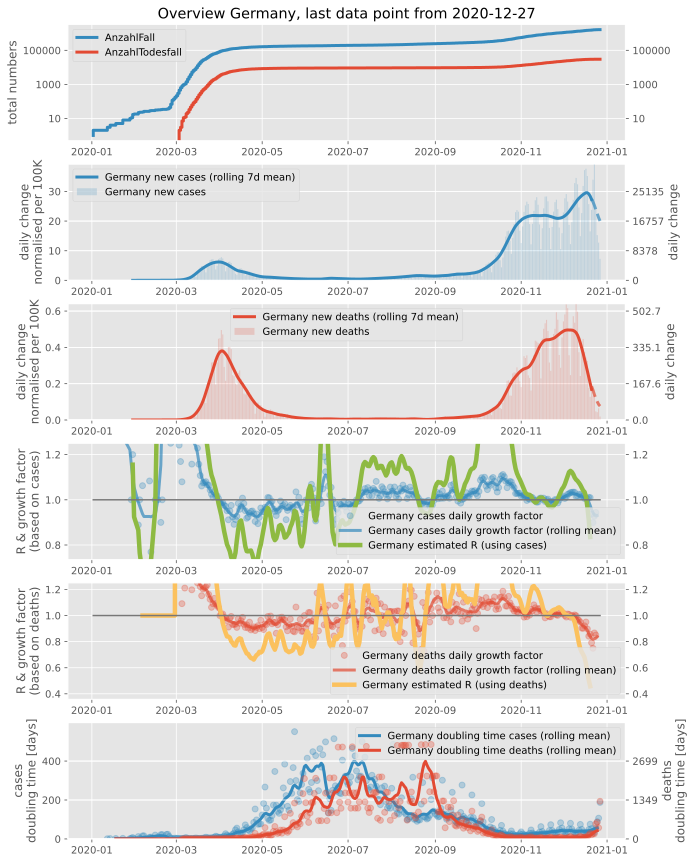

In [22]:
ov.overview(country="Germany", data=(cases_rki, deaths_rki));

## Overview plot Germany with JHU data

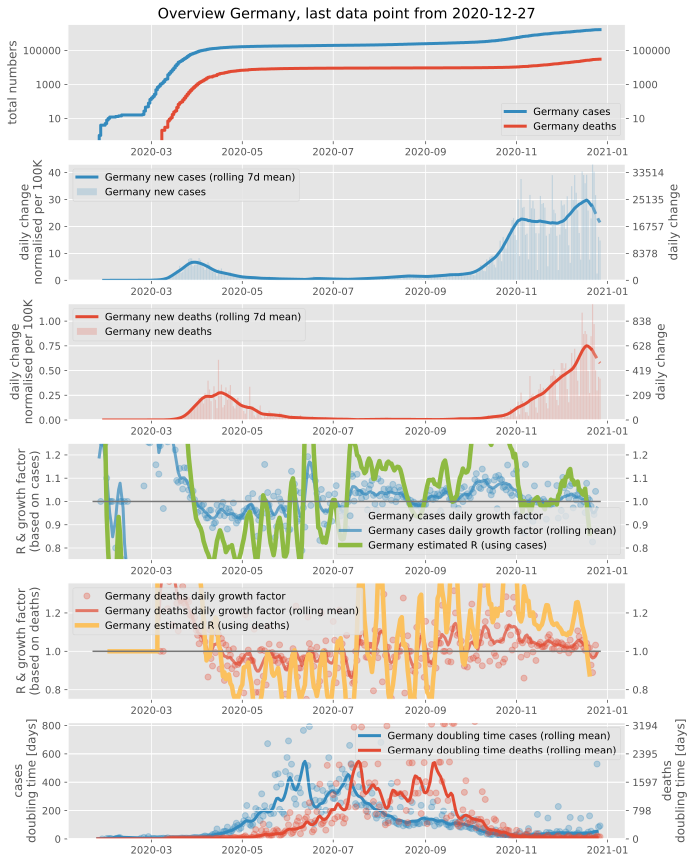

In [23]:
ov.overview(country="Germany");